## Source Code Utama

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

class eksperimen(object):
    def __init__(self, dataset=None, classifier=None, X=None, y=None, dataset_split=None, feature_names=None, target_names=None):
        self.dataset = dataset
        self.classifier = classifier
        self.X = X
        self.y = y
        self.dataset_split = dataset_split
        self.feature_names = feature_names
        self.target_names = target_names

    def get_std_dataset(self):
        self.dataset = load_iris()
        self.X = self.dataset['data']
        self.y = self.dataset['target']
#         print(self.X)

    def printmatrix_accuracy_percentage(self):
        predict = self.classifier.predict(self.dataset_split['X_test'])
    
        # accuracy
        print(accuracy_score(self.dataset_split['y_test'],predict))

        # metrics confusion
        print(confusion_matrix(self.dataset_split['y_test'],predict))
    
    def build_clf_percentage(self, clf_name):
        if (clf_name == 'dtl'):
            self.classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
        elif (clf_name == 'ann'):
            self.classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                                            hidden_layer_sizes=(10, 2), random_state=1)
        # training dengan 90% data   
        self.classifier.fit(self.dataset_split['X_train'],self.dataset_split['y_train'])

    def build_clf_full(self,clf_name):
        if (clf_name == 'dtl'):
            self.classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
        elif (clf_name == 'ann'):
            self.classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                                            hidden_layer_sizes=(10, 5), random_state=1)
        # training dengan full data   
        self.classifier.fit(self.X,self.y)
        
    def saveModel(self,namaFile):
        joblib.dump(self.classifier,namaFile)
    
    def loadModel(self,namaFile):
        self.classifier= joblib.load(namaFile)
    
    def split_dataset(self):
        # X adalah data setiap fitur, y adalah target 
        # split menjadi 90% training 10% testing
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.1 ,train_size = 0.9)
        self.dataset_split = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }

    def get_dataset(self, filename, class_index):
        le = preprocessing.LabelEncoder()
        raw_data = pd.read_csv(filename, header=None)
        array_nama_atribut = raw_data.columns
        
        feature_names = []
        index = 0
        for name in array_nama_atribut:
            if (index != class_index):
                feature_names.append(name)
            index += 1
        self.feature_names = feature_names
   
        le.fit(raw_data[raw_data.columns[class_index]])
        self.target_names = le.classes_
        
        for key in array_nama_atribut:
            list_value = raw_data[key]
            value = []
            for i in list_value:
                value.append(i)
            le.fit(value)
            # save le
            val = le.transform(value)
            raw_data[key] = val
        
        self.dataset = raw_data
        
        y = [] # target
        for target in raw_data[raw_data.columns[class_index]]: # play is the name of the class index
            y.append(target)
        self.y = y
        X = [] # domain
        i = 0
        jumlah_data = len(raw_data)
        while (i<jumlah_data):
            elem_x = []
            test = 0
            for elem in raw_data.columns:
                if (test != class_index):
                    elem_x.append(raw_data.loc[i, elem])
                test += 1
            X.append(elem_x)
            i += 1
        self.X = X
    
    def get10FoldCrossValidation_ann(self):
        # isi hidden layer sesuai dengan data
        self.classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 1), random_state=1)
        score = cross_val_score(self.classifier, self.X, self.y, cv=10)
        print(score.mean())
        
    def get10FoldCrossValidation_dtl(self):
        self.classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
        score = cross_val_score(self.classifier, self.X, self.y, cv=10)
        print(score.mean())
    
exp = eksperimen()


# LAPORAN UTAMA

## 1. Analisis Data dan Penanganan

### Analisis Data
Dalam eksperimen ini, dataset yang digunakan bernama CensusIncome. CensusIncome merupakan data dengan jumlah fitur sebanyak 14. Kelas yang merupakan target dari dataset ini adalah "<50K" dan ">=50K". Untuk mengukur kinerja dari eksperimen ini, kami melihat dari akurasi yang didapatkan pada setiap *testing* yang dilakukan.

### Penanganan Khusus
Penanganan yang kami lakukan pada eksperimen ini, yaitu:
1. Mengubah nilai-nilai nominal pada dataset agar dapat diproses oleh *classifier* DTL dan ANN
2. *Missing Attributes* dianggap menjadi sebuah nominal yang sama
3. Untuk setiap nilai nominal yang sama, di-*assign* sebuah value numeric {0,1,2,...}
4. Didapatkanlah data set yang atributnya adalah nilai numeric

## 2. Skenario Eksperimen
Pada eksperimen ini, skenario yang kami lakukan yaitu
1. Membaca dataset
2. Melakukan *preprocessing*
3. Melakukan *fit* datates terhadap *classifier* (ANN dan DTL)
4. Melakukan Testing

Lalu, faktor yang memperngaruhi hasil testing terhadap hasil eksperimen, yaitu *classifier* yang digunakan. Setiap classifier, ada beberapa faktor yang mempengaruhi pula. yaitu:
1. DTL: jumlah *node* daun maksimal 
2. ANN: jumlah *Hidden Layer* dan *Hidden State* pada setiap *layer*-nya

## 3. Hasil Eksperimen

### Membaca Dataset CensusIncome (.csv Format)


In [21]:
exp.get_dataset('CencusIncome.data.csv', 14);

### Testing yang Dilakukan

#### A. (1) Training-Testing - DTL


#### Konfigurasi
1. *node* maksimal pada daun = 20

In [23]:
exp.build_clf_full('dtl')

#### A. (2) Training-Testing - ANN

#### Konfigurasi
1. *Hidden Layer* = 2
2. *Hidden State* setiap *layer = 10

In [24]:
exp.build_clf_full('ann')

#### B. (1) 10-fold Cross Validation - DTL


In [25]:
exp.get10FoldCrossValidation_dtl()

0.852185464835


#### B. (2) 10-fold Cross Validation - ANN

In [26]:
exp.get10FoldCrossValidation_ann()

0.776142342066


![](images/tree.png?raw=true)

## 4. Analisis Fitur (Menggunakan Seaborn)

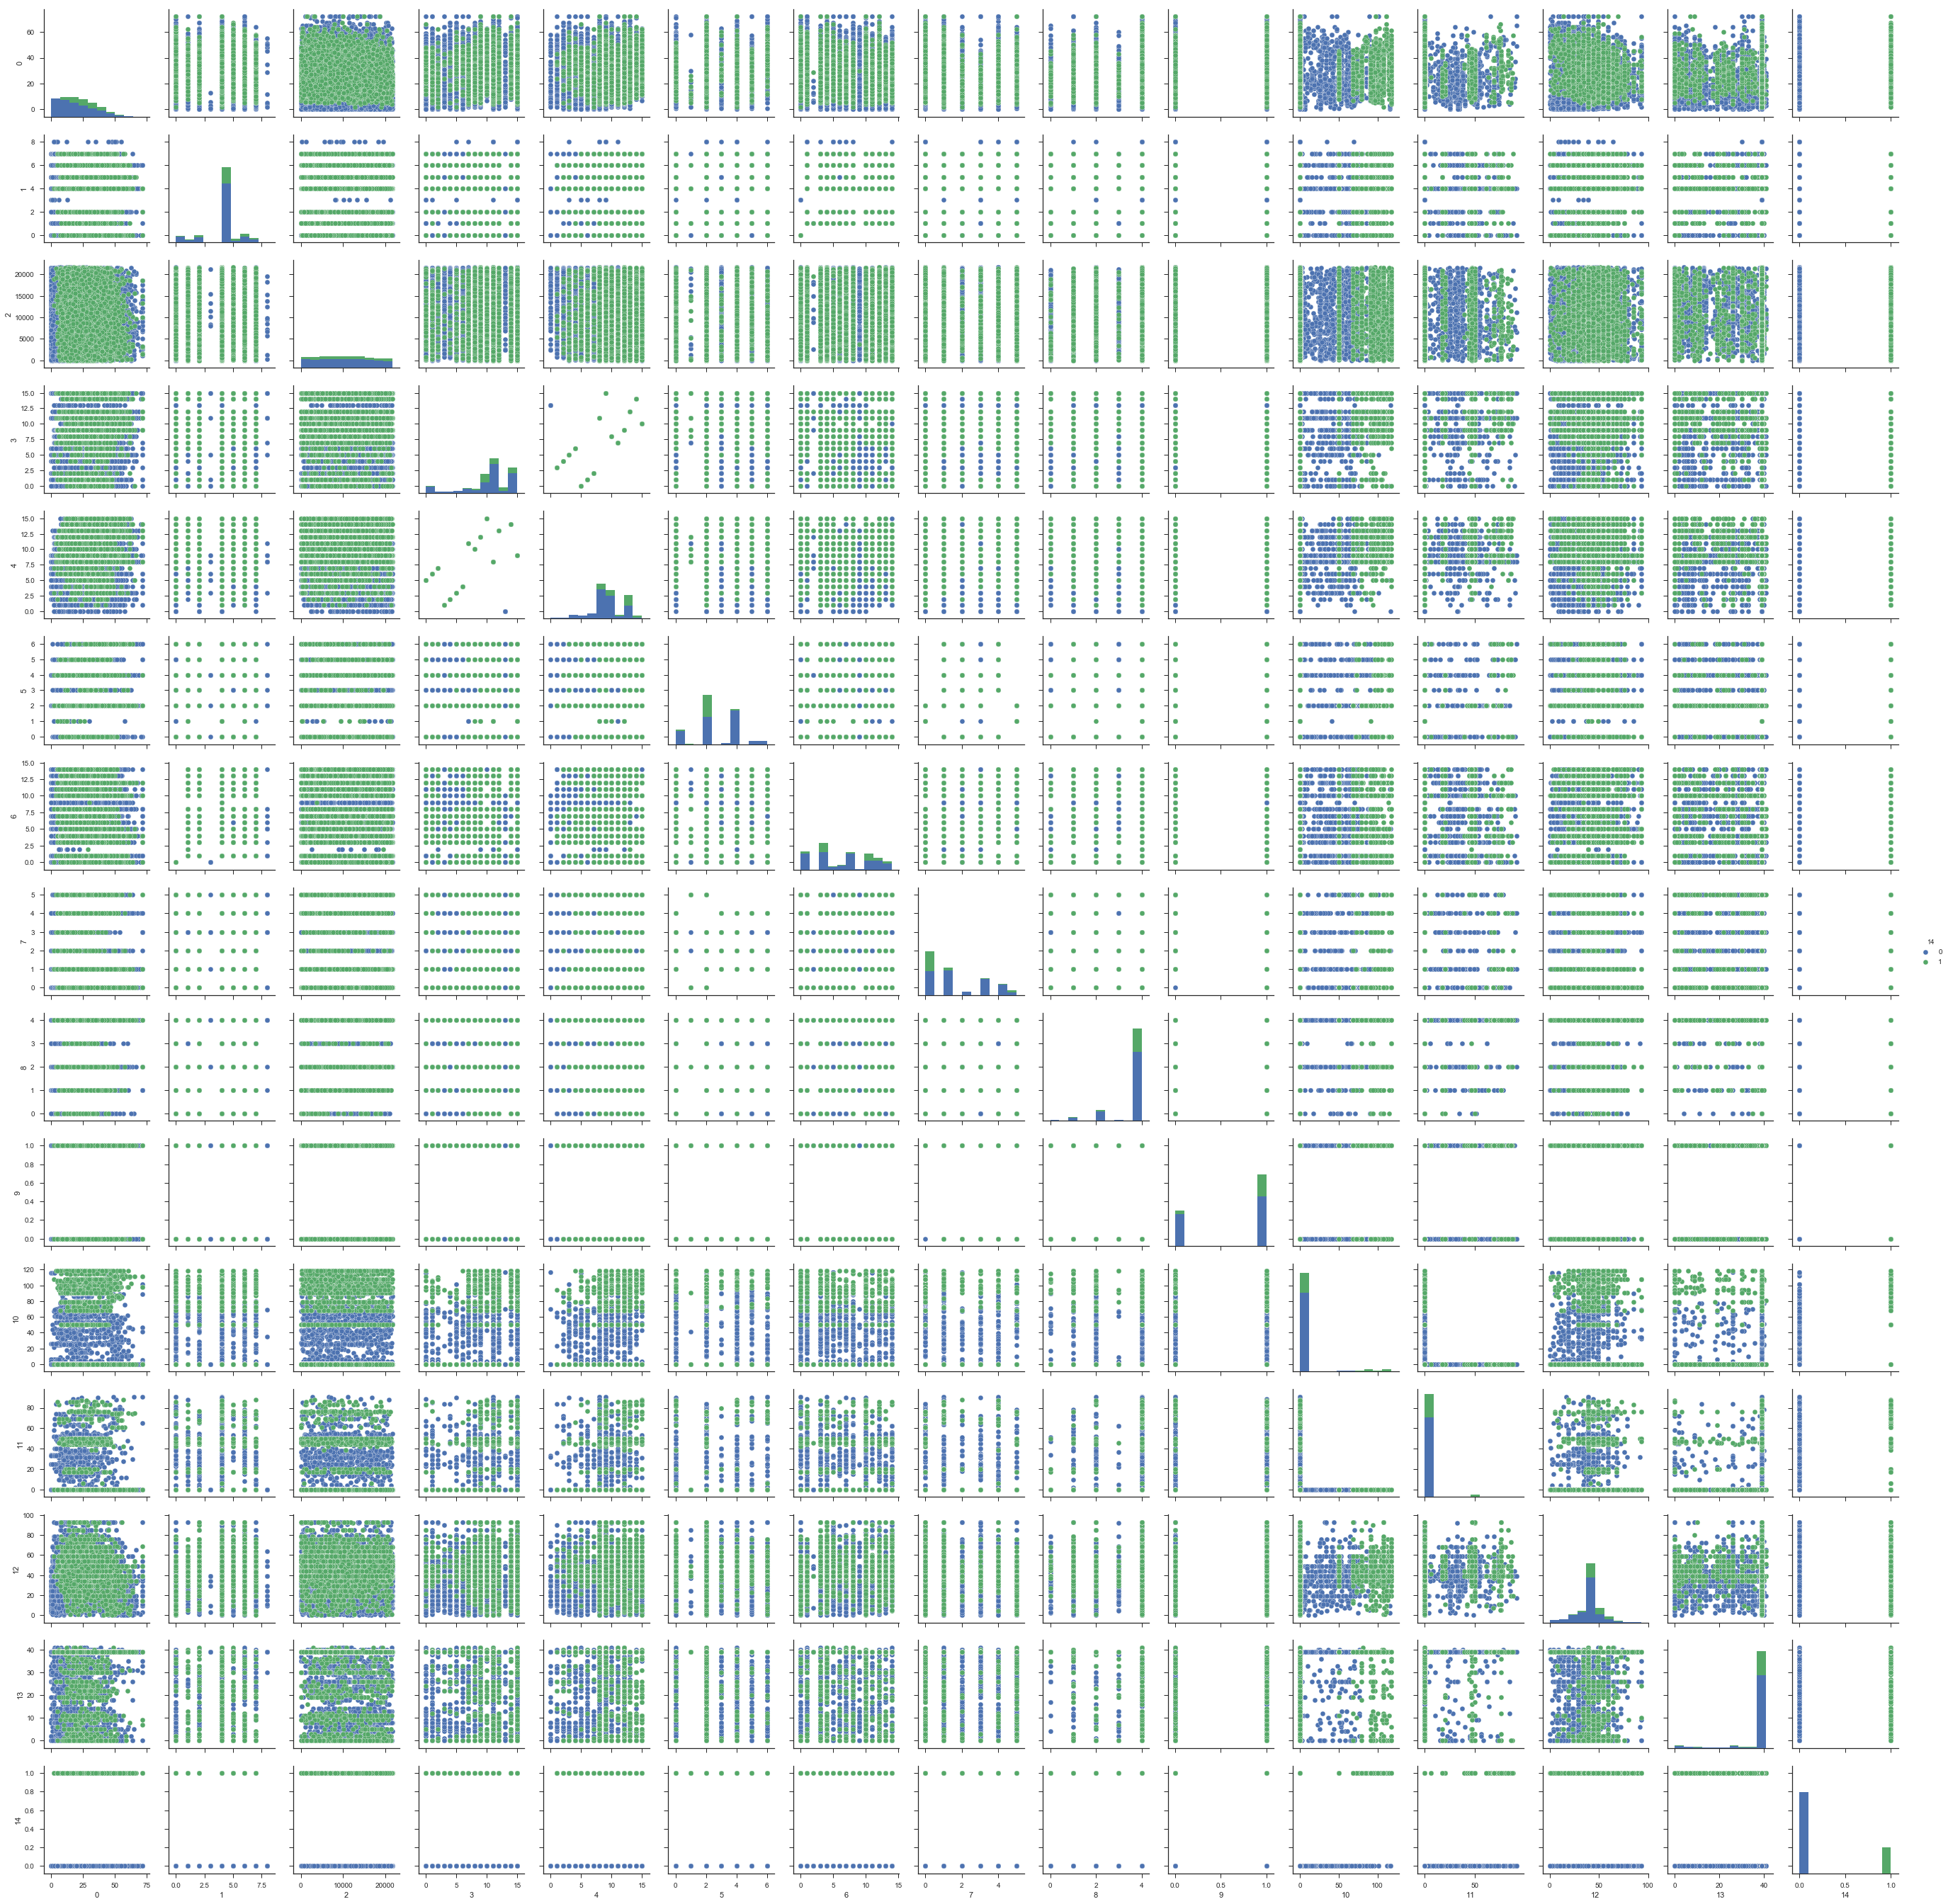

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 

iris = sns.load_dataset('iris')
# print(iris)
iris = exp.dataset
# print(iris)
sns.set(style="ticks", color_codes=True) # change style
g = sns.pairplot(iris, hue=14)

Penjelasan analisis fitur
1. Data ini memiliki banyak fitur (totalnya 14 fitur)
2. Setiap fitur memiliki persebaran klasifikasi yang berbeda-beda
3. Dari pairplot, dapat dilihat bahwa setiap fitur memiliki kekuatan pengaruh yang berbeda-beda terhadap kelas
4. Biarpun pengaruhnya berbeda-beda, tapi setiap fitur memiliki pengaruh terhadap klasifikasi
4. Sehingga pada eksperimen kali ini, kami menggunakan seluruh fitur yang ada

## 5. Konsistensi Model

dgfhjk

## 6. Kesimpulan

Pada Eksperimen ini, kesimpulan yang dapat diambil adalah:
1. Beberapa data perlu dipreproses terlebih dahulu karena data di dunia nyata memiliki missing attribut, dan mungkin formatnya tidak sesuai
2. DTL dengan max_leaf_node=20 menghasilkan akurasi 85,2%
3. ANN dengan 1 hidden layer, 10 node hidden layer menghasilkan akurasi 77,6%
4. DTL pada eksperimen kali ini lebih baik di bandingkan ANN
5. Kekuatan setiap fitur untuk mengklasifikasikan data berbeda-beda, dilihat dari pair plot seaborn